# Analysis of Kentucky Transportation Cabinet Californa Bearing Ratio Data

The Geatechnical Branch within the Kentucky Transportation Cabinet (KYTC) uses a modified version of the [Californa Bearing Ratio](https://en.wikipedia.org/wiki/California_bearing_ratio)(CBR) to quantify the strength of subsurface soils for pavement design. The test involves compacting a sample in a mold, soaking that sample, and then penetracting the sample with a piston. A bearing ratio is calculated at standard refrence stresses and penetration depths to obtain a number representing the strength of the soil sample as compared to a standard crushed rock material. The preparation is differenct between the standard and kentucky CBR methods and a dicussion of the differences can be found in [Beckham and Allen (1990)](https://uknowledge.uky.edu/ktc_researchreports/484/).

The goal of the investigation is to develop a relationship that can be used to estimate Kentucky CBR values based on varying index properties. The data that will be used was obatined from soil testng on roadway project by the Cabinet. 

In [1]:
# Python Informtion
import sys
print(sys.version) #3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [2]:
# Project Imports
import numpy as np # version 1.14.0
import pandas as pd # version 0.22.0
import matplotlib.pyplot as plt

In [3]:
# Setting Up Environment
%matplotlib inline

## Importing KYTC CBR Data

In [4]:
df = pd.read_csv("2018-02-23 Extracted CBR Data From gINT Database.txt")
df.head()

,County_Name,Project_Number,PointID,Elevation,Latitude83,Longitude83,Hole_Type,Bag_Number,LabID,AASHTO_Symbol,...,PF2,PF1,PF3_4,PF3_8,PF4,PF10,PF40,PF200,Pct_Clay,Pct_Colloid
0,Allen,R-024-2011,5,688.37,36.75,-86.15,cut profile,NaN,With Gravel,A-4,...,100.0,100.00,96.76,91.21,83.81,75.83,63.04,55.56,17.15,14.73
1,Allen,R-075-2007,35,626.00,36.72,-86.27,cut profile,NaN,No Raw Data,A-4,...,100.0,100.00,99.40,87.10,74.30,73.60,49.60,43.70,14.20,9.30
2,Allen,R-075-2007,38,605.13,36.72,-86.27,cut profile,NaN,No Raw Data,A-6,...,100.0,100.00,99.70,97.20,93.60,93.40,82.40,74.70,24.00,20.90
3,Allen,R-075-2007,40,568.44,36.73,-86.27,fill profile,NaN,No Raw Data,A-4,...,100.0,98.10,94.50,88.50,81.80,81.10,61.10,45.60,13.10,11.80
4,Allen,R-075-2007,42,610.80,36.73,-86.27,cut profile,NaN,With Gravel,A-4,...,100.0,95.19,91.45,86.65,82.38,80.25,66.52,60.57,18.90,13.68


In [5]:
df.dtypes

County_Name              object
Project_Number           object
PointID                  object
Elevation               float64
Latitude83              float64
Longitude83             float64
Hole_Type                object
Bag_Number               object
LabID                    object
AASHTO_Symbol            object
AASHTO_Group_Index       object
USCS_Symbol              object
USCS_Group_Name          object
Max_Dry_Density         float64
Opt_Moisture_Content    float64
Method                   object
CBR                     float64
Liquid_Limit            float64
Plastic_Limit           float64
Plasticity_Index        float64
Liquidity               float64
Specific_Gravity        float64
PF3                     float64
PF2                     float64
PF1                     float64
PF3_4                   float64
PF3_8                   float64
PF4                     float64
PF10                    float64
PF40                    float64
PF200                   float64
Pct_Clay

## CBR Discriptive Statistics

Now that the KYTC CBR data is imported, I'm going to look at the general information of CBR values in the data.

In [6]:
df['CBR'].describe()

count    1783.000000
mean        6.456652
std         5.286861
min         0.500000
25%         3.100000
50%         5.000000
75%         7.900000
max        47.800000
Name: CBR, dtype: float64

Text(0.5,0,'KY CBR Values')

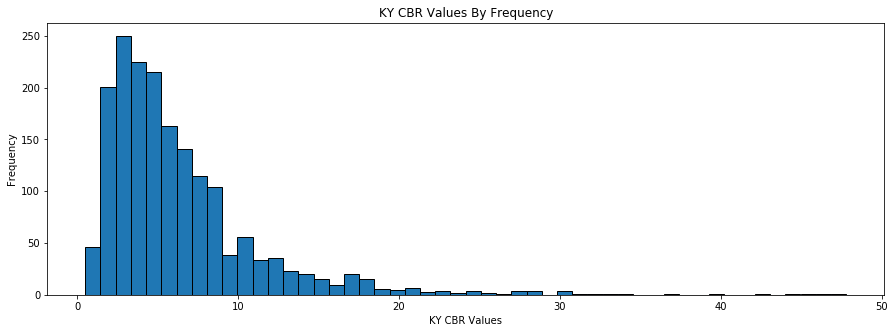

In [59]:
# Create Histogram
plot = df['CBR'].plot.hist(title="KY CBR Values By Frequency",bins=50,figsize=(15,5),edgecolor="black")
plot.set_xlabel("KY CBR Values")

What does the CBR values look like when grouped by the [AASHTO](https://en.wikipedia.org/wiki/AASHTO_Soil_Classification_System) soil classification symbol.

In [8]:
byAASHTO = df.groupby('AASHTO_Symbol')
byAASHTO['CBR'].describe()

,count,mean,std,min,25%,50%,75%,max
AASHTO_Symbol,,,,,,,,
A-1-a,3.0,16.700000,13.340540,5.6,9.30,13.00,22.250,31.50
A-1-b,6.0,21.383333,15.029227,5.0,8.60,20.75,31.400,42.30
A-2-4,33.0,16.132424,9.677248,3.5,10.30,13.10,20.100,45.10
A-2-6,11.0,14.260000,8.884346,2.7,6.45,13.50,20.700,27.80
A-2-7,2.0,3.400000,2.687006,1.5,2.45,3.40,4.350,5.30
A-3,1.0,27.100000,NaN,27.1,27.10,27.10,27.100,27.10
A-4,373.0,8.928686,6.602059,1.1,4.80,7.20,10.870,47.80
A-5,13.0,6.169231,7.529540,2.5,2.90,3.30,6.100,30.70
A-6,555.0,6.629856,4.121007,1.0,3.90,5.60,8.300,30.30


What does the CBR values look like when grouped by the [USCS](https://en.wikipedia.org/wiki/Unified_Soil_Classification_System) soil classification symbol 

In [9]:
byUSCS = df.groupby('USCS_Symbol')
byUSCS['CBR'].describe()

,count,mean,std,min,25%,50%,75%,max
USCS_Symbol,,,,,,,,
CH,362.0,3.587707,2.049276,0.5,2.1,3.000,4.485,13.12
CL,971.0,6.225664,4.105388,0.5,3.4,5.200,7.790,33.60
CL-ML,69.0,9.505507,6.500886,1.2,5.9,8.300,10.900,39.40
GC,11.0,8.987273,5.784097,1.5,5.3,6.300,14.450,18.20
GC-GM,1.0,3.000000,NaN,3.0,3.0,3.000,3.000,3.00
GM,5.0,12.520000,10.811892,5.8,6.1,8.200,11.000,31.50
MH,54.0,5.345556,3.211447,1.5,2.9,4.325,7.060,19.26
ML,141.0,7.023121,4.302069,1.1,4.0,6.000,8.600,27.50
SC,69.0,10.104348,9.011552,1.0,4.5,6.800,13.500,46.00


## Histogram of all KY CBR values by soil type

In [ ]:
# Create Function for Creating Arrays Based on Selection Criteria So that I Can Plot Histogram of each soil type

In [49]:
# Select CBR Vales Based on Soil Type And No Negative Values
NoNAN = df['CBR'] > 0
CH = df['USCS_Symbol'] == "CH"
CHholder = df[CH & NoNAN]
CL = df['USCS_Symbol'] == "CL"
CLholder = df[CL & NoNAN]

# Create Arrarys of Selected Data 
ArraryCL = CLholder["CBR"].values
ArraryCH = CHholder['CBR'].values

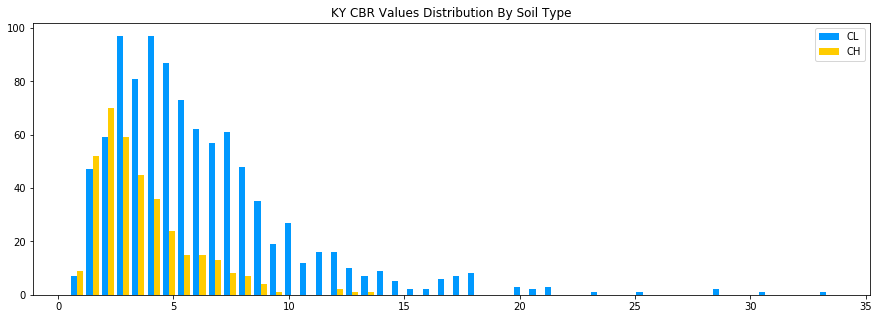

In [86]:
# Style Parameters
color_list = ['#0099ff','#ffcc00']
label_list = ['CL','CH']

# Create Stack Histgram
plt.figure(figsize=(15,5))
plt.hist([ArraryCL,ArraryCH], stacked=False, alpha=1, bins=50, color=color_list, label=label_list, normed=False)
plt.title("KY CBR Values Distribution By Soil Type")
plt.legend()
plt.show()

example of cool [histogram plot](https://matplotlib.org/2.0.2/users/screenshots.html)